# **Space X  Falcon 9 First Stage Landing Prediction**


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [8]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>.


In [9]:
Y=data['Class'].to_numpy()
Y[:5]

array([0, 0, 0, 0, 0])

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [11]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=6)

we can see we only have 18 test samples.


In [13]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [14]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [15]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv=GridSearchCV(lr,parameters, cv=10)
logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [16]:
print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8214285714285715


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [17]:
y_predict = logreg_cv.predict(X_test)
print("Accuracy of logistic regression classifier on test set: {:.2f}".format(logreg_cv.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.94


Lets look at the confusion matrix:


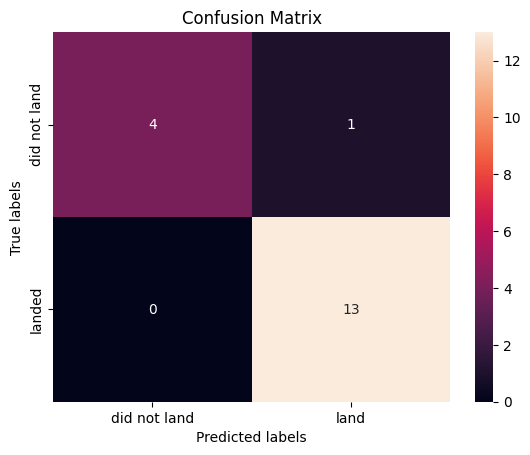

In [18]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 13 (True label is landed, Predicted label is also landed)

False positives - 1 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [19]:
parameters = {'kernel':('linear','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [20]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [21]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(0.03162277660168379), 'gamma': np.float64(0.001), 'kernel': 'linear'}
accuracy : 0.8214285714285714


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [22]:
y_predict = svm_cv.predict(X_test)
print("Accuracy of SVM classifier on test set: {:.2f}".format(svm_cv.score(X_test, Y_test)))

Accuracy of SVM classifier on test set: 0.89


We can plot the confusion matrix


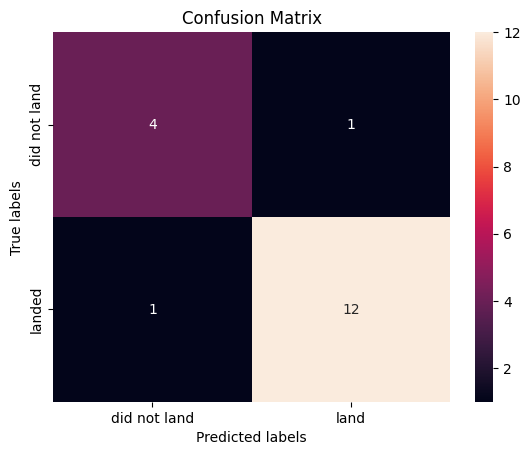

In [23]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [26]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree = DecisionTreeClassifier()

In [27]:
tree_cv = GridSearchCV(tree, parameters, cv=10, error_score='raise')
try:
    tree_cv.fit(X_train, Y_train)
except Exception as e:
    print(f"An error occurred: {e}")

In [28]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8732142857142857


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [29]:
y_predict = tree_cv.predict(X_test)
print("Accuracy of Decision Tree classifier on test set: {:.2f}".format(tree_cv.score(X_test, Y_test)))

Accuracy of Decision Tree classifier on test set: 0.78


We can plot the confusion matrix


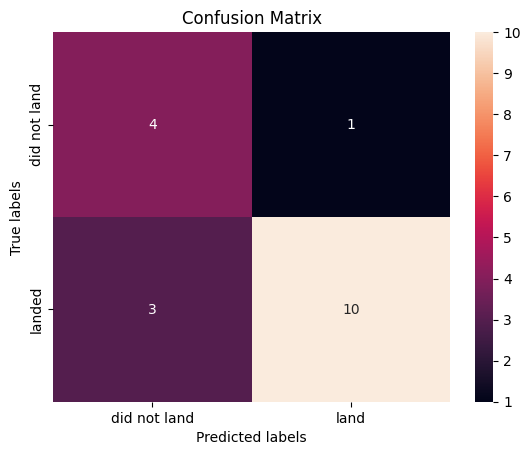

In [30]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that Decision Tree can distinguish between the different classes.  We see that the problem is false positives.
Overview:

True Postive - 13 (True label is landed, Predicted label is also landed)

False -positive 3 (True label is not landed, Predicted label is landed)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [31]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [32]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [34]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.8232142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [35]:
y_predict = knn_cv.predict(X_test)
print("Accuracy of KNN classifier on test set: {:.2f}".format(knn_cv.score(X_test, Y_test)))    

Accuracy of KNN classifier on test set: 0.83


We can plot the confusion matrix


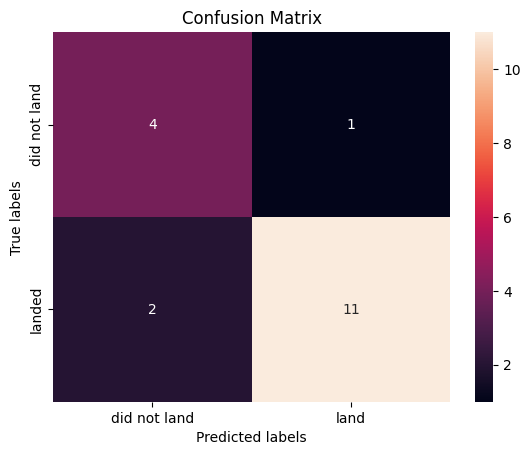

In [36]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [43]:
# Accuracy values for each model
train_accuracies = [0.8214, 0.8214, 0.8732, 0.8232]
test_accuracies = [0.94, 0.89, 0.78, 0.83]
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']

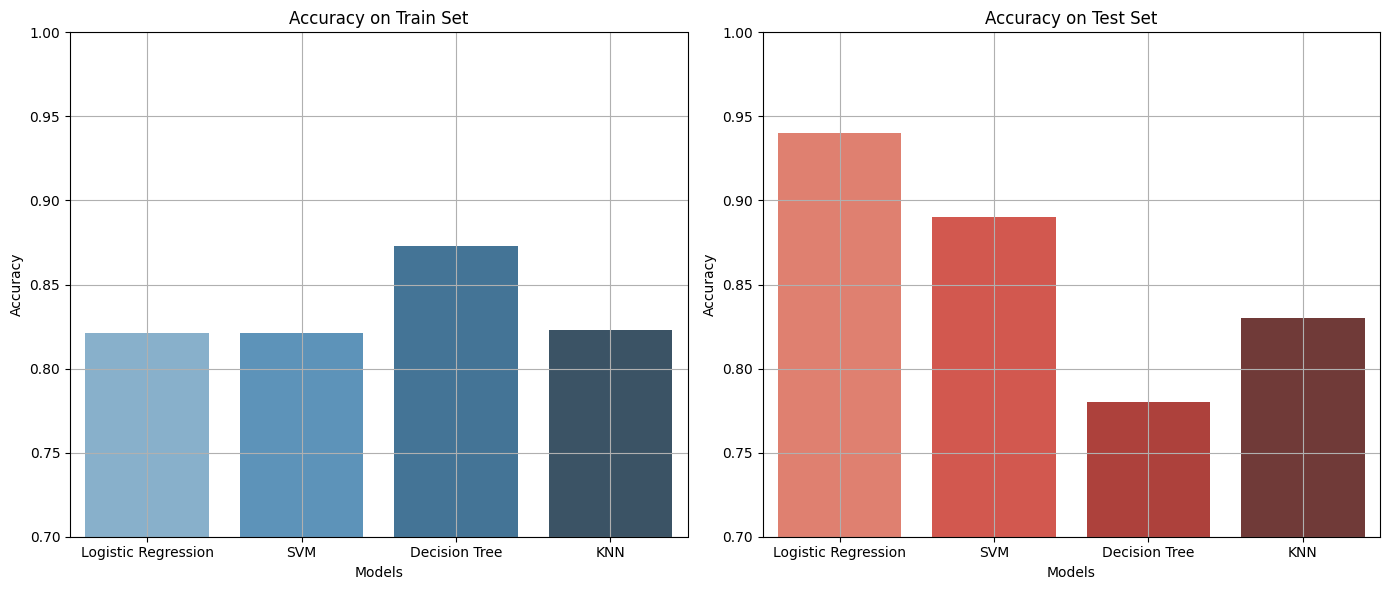

In [47]:
import seaborn as sns

# Create a DataFrame for plotting
accuracy_data = pd.DataFrame({
    'Model': models,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

# Plotting the accuracies using seaborn
plt.figure(figsize=(14, 6))

# Plotting train set accuracy
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Train Accuracy', data=accuracy_data, hue='Model', palette='Blues_d', dodge=False)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy on Train Set')
plt.ylim(0.7, 1.0)
plt.legend([],[], frameon=False)
plt.grid(True)

# Plotting test set accuracy
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Test Accuracy', data=accuracy_data, hue='Model', palette='Reds_d', dodge=False)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy on Test Set')
plt.ylim(0.7, 1.0)
plt.legend([],[], frameon=False)
plt.grid(True)

plt.tight_layout()
plt.show()

***Model Performance Summary***

- **Logistic Regression:**
  - Training Set Accuracy: 0.8214
  - Test Set Accuracy: 0.94
  - True Positives: 13
  - False Positives: 0
  - True Negatives: 4
  - False Negatives: 1

- **SVM (Support Vector Machine):**
  - Training Set Accuracy: 0.8214
  - Test Set Accuracy: 0.89
  - True Positives: 12
  - False Positives: 1
  - True Negatives: 4
  - False Negatives: 1

- **Decision Tree:**
  - Training Set Accuracy: 0.8732
  - Test Set Accuracy: 0.78
  - True Positives: 10
  - False Positives: 1
  - True Negatives: 4
  - False Negatives: 3

- **KNN (K-Nearest Neighbors):**
  - Training Set Accuracy: 0.8232
  - Test Set Accuracy: 0.83
  - True Positives: 11
  - False Positives: 1
  - True Negatives: 4
  - False Negatives: 2

### Conclusion

**Best Model: Logistic Regression**<br>
**WHY**:<br>

 **1.Highest Test Set Accuracy:** Logistic Regression achieved the highest test set accuracy of 0.94, indicating that it performs best on unseen data<br>
 
 **2.Confusion Matrix Metrics:**
   - True Positives: Logistic Regression correctly identified 13 true positives, the highest among all models.
   - False Positives: Logistic Regression had 0 false positives, indicating no incorrect predictions of the positive class.
   - True Negatives: Logistic Regression correctly identified 4 true negatives, consistent with other models.
   - False Negatives: Logistic Regression had only 1 false negative, indicating a low number of missed positive cases. <br>
   
**3.Overfitting:** The Decision Tree model shows signs of overfitting, with a high training set accuracy (0.8732) but a significantly lower test set accuracy (0.78)<br>

**4.Model Interpretability:** Logistic Regression is generally easier to interpret compared to SVM and Decision Tree models, as it provides coefficients that indicate the importance of each feature<br>


## Save the best model

In [41]:
from joblib import dump

# Save the logistic regression model
dump(logreg_cv, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']